In [1]:
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
import math
from math import sqrt 
from math import pi
from math import e
from scipy.optimize import root

import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [2]:
df = pd.read_csv('pixel_df.csv')

In [3]:
df.iloc[10]

Unnamed: 0            10.000000
amplitude            -22.659179
stddev                 0.042466
central_wavelength     0.027445
Name: 10, dtype: float64

In [4]:
df.iloc[10]['amplitude']

-22.659179435529644

In [5]:
df.index.stop

4194304

In [4]:
pixel_num=df.index.stop

## first 3

In [29]:
for i in range(1):
    print(df.iloc[i])
    print()

Unnamed: 0             0.000000
amplitude            -22.659179
stddev                 0.042466
central_wavelength     0.027393
Name: 0, dtype: float64



## test

In [51]:
test_A=[1,2,3]
test_central=[3,2,1]
test_stddev=[1,2,1]

wave_list=np.linspace(-7,8,2000)
df_test = pd.DataFrame({'amplitude': test_A,'central_wavelength': test_central, 'stddev': test_stddev, })



In [63]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

wave_list=np.linspace(-7,8,200)
df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })


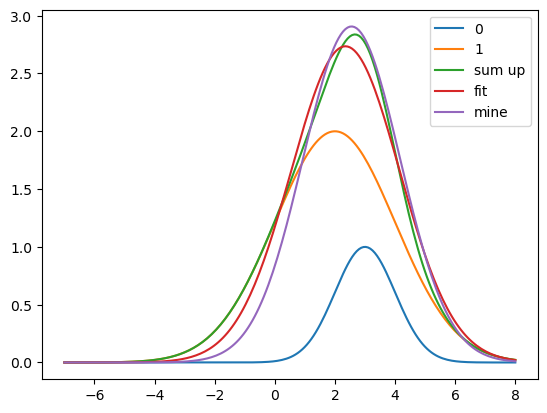

In [64]:
num=2
c=[]
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i], mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))
for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()

for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")

my_fit=models.Gaussian1D(amplitude=2.906841492485094, mean= 2.5520865292501513,stddev= 1.6161039331223173)
ax.plot(wave_list,my_fit(wave_list),label="mine")
ax.legend()

In [65]:
c_fitted

<Gaussian1D(amplitude=2.73541144, mean=2.34814553, stddev=1.80349515)>

In [36]:
my_fit

<Gaussian1D(amplitude=2.90684149, mean=2.55208653, stddev=1.61610393)>

In [56]:
m=models.Gaussian1D(amplitude=5.83541282, mean=2.44814509, stddev=1.70349312)

In [57]:
((m(wave_list)-total)**2).sum()

1891.8532450269254

In [58]:
((my_fit(wave_list)-total)**2).sum()

2397.506140789761

In [54]:
( (c_fitted(wave_list)-total)**2).sum()

64.33892901755851

In [16]:
total

array([8.01305948e-05, 8.14943866e-05, 8.28802230e-05, ...,
       2.27271969e-02, 2.24731941e-02, 2.22217197e-02])

## std equations

In [2]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [3]:
def equations(p,test_A,test_central,test_stddev,j):
    A, mu ,sigma= p

    eq1=A/(2*sqrt(pi)*sigma)   
    eq2=0
    eq3=A*sigma/(4*sqrt(pi))  
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
    
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        eq1=eq1-A_i *     e**(  -(mu_i-mu)**2/(2*(sigma_i**2+sigma**2))  )    \
        /(  sqrt(2*pi*(sigma_i**2+sigma**2) )  )
        
        eq2=eq2-A_i*        (mu_i-mu)*(sigma**2)   * e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) \
                /(   sqrt(2*pi)*(sigma_i**2+sigma**2)**(3/2)  )
        
        eq3=eq3-A_i  * (sigma**2)*  ((mu_i-mu)**2 *(sigma**2) + (sigma**2)*(sigma_i**2) +  sigma_i**4  )* \
        e**(-(mu_i-mu)**2/(2*(sigma_i**2+sigma**2)))    /(  sqrt(2*pi)*(sigma**2+sigma_i**2)**(2.5)  )
    
    print(eq1,eq2,eq3)
   
    # print(A, mu ,sigma)
    return [eq1, eq2, eq3]

In [4]:
# pixel_num=df.index.stop
i=1
A, mu ,sigma = fsolve(equations,x0=(2.73541282,2.34814,1.8034931,),xtol=1e-10,maxfev=50,
                      args=(test_A,test_central,test_stddev,i))
print("result")
print(A, mu ,sigma)



-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.04997586479743785 -0.04587936038885048 -0.02489366859097175
-0.049975858421800995 -0.04587936038885048 -0.02489365822231393
-0.049975865290989296 -0.0458793514225463 -0.024893665222698313
-0.049975867354603826 -0.04587935963806295 -0.02489366332493359
0.011769031024386256 -0.0016477346392533149 -0.0002281456670641946
-0.002550169625127774 0.00034942288803245514 -0.0014253731419960891
-0.0002505532075443573 4.0607676115925195e-05 -0.00022939759755957745
-1.0371575573098202e-05 2.8962662698001074e-06 -1.3987572196227926e-05
-4.813959447735883e-07 1.2507736077416176e-07 -4.798027379848691e-07
1.4779336365844387e-08 -3.6436266920292226e-09 1.829257928465111e-08
3.2448688180863883e-10 -7.825931569449551e-11 4.381844886935937e-10
3.2236435743016045e-12 -7.787936961989317e-13 4.325650948544535e-12
-2.1649348980190553e-15 5.689893001203927e-16 -3.164135620181696e-15


<Gaussian1D(amplitude=2.73541282, mean=2.34814509, stddev=1.80349312)>

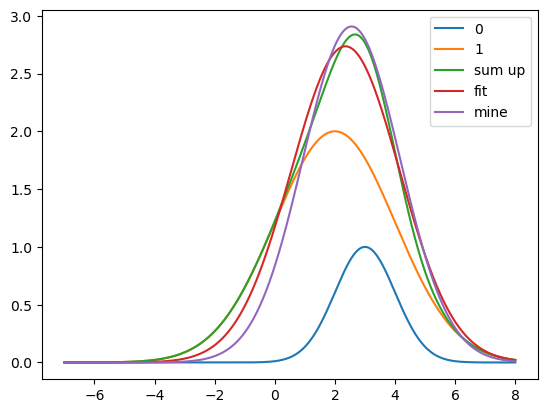

In [5]:
num=2
c=[]
wave_list=np.linspace(-7,8,2000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i], mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))

for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
ax.plot(wave_list,models.Gaussian1D(amplitude=A, mean=mu, stddev=sigma)(wave_list),label="mine")

ax.legend()
c_fitted

Text(0.5, 0.5, 'central_wave')

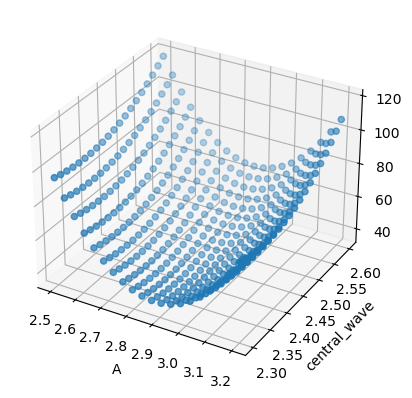

In [13]:
# fig, ax = plt.subplots()
A =np.linspace(2.5,3.2,20)
M=np.linspace(2.3,2.6,20)
error=np.zeros((20,20))
point=np.zeros((20,20,2))
for i in range(len(A)):
    for j in range(len(M)):
        error[i,j]=sum((models.Gaussian1D(amplitude=A[i], mean=M[j], stddev=1.61610393)(wave_list)-total)**2)
        point[i,j]=[A[i],M[j]]
            
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter3D(point[:,:,0],point[:,:,1],error,zdir='z')
ax.set_xlabel('A')
ax.set_ylabel('central_wave')

Text(0.5, 0, 'A')

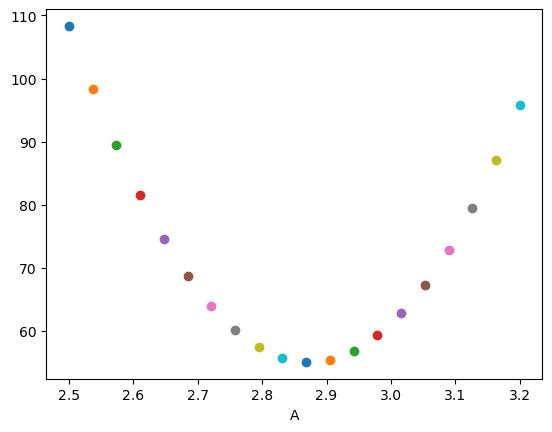

In [14]:
A =np.linspace(2.5,3.2,20)
fig, ax = plt.subplots()
for i in range(len(A)):
    ax.scatter(A[i],sum((models.Gaussian1D(amplitude=A[i], 
                                           mean=2.55208652926, stddev=1.61610393)(wave_list)-total)**2)     )
ax.set_xlabel("A")

In [96]:
error.shape

(20, 20)

In [173]:
sum((c_fitted(wave_list)-total)**2)

1.9640102609571497

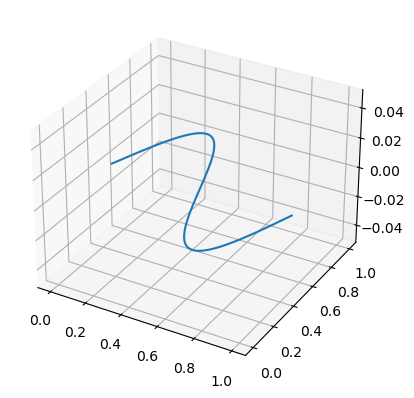

In [79]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')



## 对称拟合 std exp  visualization

In [171]:
def equations(p,test_A,test_central,test_stddev,j):
    A, mu ,sigma= p

    eq1=A/(2*sqrt(pi)*sigma)   
    eq2=0
    eq3=A*sigma/(4*sqrt(pi))  
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
    
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        eq1=eq1-A_i *     e**(  -(mu_i-mu)**2/(2*(sigma_i**2+sigma**2))  )    \
        /(  sqrt(2*pi*(sigma_i**2+sigma**2) )  )
        
        eq2=eq2-A_i*        (mu_i-mu)*(sigma**2)   * e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) \
                /(   sqrt(2*pi)*(sigma_i**2+sigma**2)**(3/2)  )
        
        eq3=eq3-A_i  * (sigma**2)*  ((mu_i-mu)**2 *(sigma**2) + (sigma**2)*(sigma_i**2) +  sigma_i**4  )* \
        e**(-(mu_i-mu)**2/(2*(sigma_i**2+sigma**2)))    /(  sqrt(2*pi)*(sigma**2+sigma_i**2)**(2.5)  )
    
    # print(eq1,eq2,eq3)
   
    # print(A, mu ,sigma)
    return [eq1, eq2, eq3]

In [177]:
test_A=[1,1]
test_central=[-5,0]
test_stddev=[1,5]

df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,-5,1
1,1,0,5


1.7546168472767093e-15 -0.9679621437325259 263656765.0871455


<Gaussian1D(amplitude=1.16519773, mean=-1.59758386, stddev=5.36190227)>

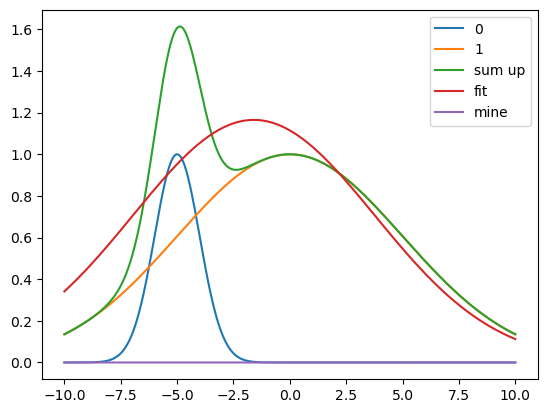

In [183]:
num=2
c=[]

A, mu ,sigma = fsolve(equations,x0=(1,-1.64814,5),
                      args=(test_A,test_central,test_stddev,i))

print(A, mu ,sigma)


wave_list=np.linspace(-10,10,2000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i], mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))

for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
ax.plot(wave_list,models.Gaussian1D(amplitude=A, mean=mu, stddev=sigma)(wave_list),label="mine")

ax.legend()
c_fitted

## root

In [17]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [18]:

def equations(p,test_A,test_central,test_stddev,j):
    A, mu ,sigma= p
    j=1
    print(j)
    
    eq1=A/(2*sqrt(pi)*sigma)   
    eq2=0
    eq3=A/(4*sqrt(pi))  
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
    
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        

        
        eq1=eq1-A_i *     e**(  -(mu_i-mu)**2/(2*(sigma_i**2+sigma**2))  )    \
        /(  sqrt(2*pi*(sigma_i**2+sigma**2) )  )
        
        
        
        eq2=eq2-A_i*        (mu_i-mu)*(sigma**2)   * e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) \
                /(   sqrt(2*pi)*(sigma_i**2+sigma**2)**(3/2)  )
        
        
        
        eq3=eq3-A_i  * (sigma)*  ((mu_i-mu)**2 *(sigma**2) + (sigma**2)*(sigma_i**2) +  sigma_i**4  )* \
        e**(-(mu_i-mu)**2/(2*(sigma_i**2+sigma**2)))    /(  sqrt(2*pi)*(sigma**2+sigma_i**2)**(2.5)  )
        
        # print("eq1")
    print()
    print(eq1)
    print(eq2)
    print(eq3)
        # print(df)
    return [eq1, eq2, eq3]

In [21]:
sol = root(equations,x0=(2.73541144,2.3481455,1.80349515,),args=(test_A,test_central,test_stddev,i))


1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976353293781944
-0.045877893723647596
-0.013802692223705726
1

-0.049976346918155584
-0.045877893723647596
-0.013802686474500059
1

-0.04997635378731766
-0.045877884757310694
-0.013802690356083336
1

-0.04997635585093249
-0.04587789297285249
-0.013802689098111443
1

0.01117004175936176
-0.001536065568292555
0.001380883304959002
1

-0.0023489282340634077
0.000296258936376928
-0.0008321471863854679
1

-0.00018454404824086446
2.7876050096173333e-05
-6.484553759628087e-05
1

8.00880322004982e-07
1.4156637667683825e-09
3.850334295840696e-07
1

2.4902418127581427e-08
-4.914615561735225e-09
1.635664931276537e-08
1

1.0628246616128934e-09
-2.7658254853069053e-10
1.9291079844663273e-10
1

-1.0927703186780491e-10
2.4171720180987677e-11
-5.079298093235707e-11


## draft

In [124]:
f



-3.5 -87.5


In [12]:
2**3*100

800

In [ ]:
test_A=[1,2,3]
test_stddev=[1,2,1]
test_central=[3,21,1]

In [ ]:
test_A=[1,2,3]
test_stddev=[1,2,1]
test_central=[3,21,1]
df_test = pd.DataFrame({'amplitude': test_A, 'stddev': test_stddev, 'central_wavelength': test_central})

In [108]:
1/2*3/4

0.375

In [120]:
3*4**2

48

In [185]:
3**3+2**2

31

# simplifed

In [21]:
test_A=[1,2]
test_central=[3,2]
test_stddev=[1,2]

wave_list=np.linspace(-7,8,200)
df_test = pd.DataFrame({'amplitude': test_A, 'central_wavelength': test_central, 'stddev': test_stddev, })
df_test

,amplitude,central_wavelength,stddev
0,1,3,1
1,2,2,2


In [41]:
def equations(p,test_A,test_central,test_stddev):
    mu ,sigma= p

    eq1=0 
    eq2=0
    # print(df)
    # for i in range(pixel_num):            
    for i in range(2):
        
        A_i=test_A[i]
        mu_i=test_central[i]
        sigma_i=test_stddev[i] 
        
        exp_i=e**(  -(mu-mu_i)**2/(2*(sigma**2+sigma_i**2))   ) 
        
        eq1=eq1+A_i* exp_i *(1/sqrt(sigma**2+sigma_i**2)-2*(sigma**2*(mu-mu_i)**2+sigma**2*sigma_i**2+sigma_i**4)\
                             /(sigma**2+sigma_i**2)**2.5)
        
        
        eq2=eq2+A_i   *        (mu_i-mu)   *     exp_i \
                /(   (sigma_i**2+sigma**2)**(3/2)  )  # right
          
    print(eq1,eq2)
   
    return [eq1, eq2]

In [42]:
sol = fsolve(equations,x0=(3.34,1.08),args=(test_A,test_central,test_stddev))
print(sol)

-0.508874794394235 -0.2956356471249598
-0.508874794394235 -0.2956356471249598
-0.508874794394235 -0.2956356471249598
-0.5088748075093288 -0.2956356661597418
-0.5088747776520802 -0.2956356429589654
-0.11618572422201853 -0.06661460672979412
-0.043513070509660745 -0.023332761864464452
-0.005750935483941261 -0.0036267302391728012
-0.0010095347893822604 -0.00033595081273279925
0.00030335450981919254 5.595775366534772e-05
-2.9213303249425726e-05 -5.802797052922859e-06
-3.088444246457378e-07 -6.150310562225147e-08
-1.4217235722036037e-10 -2.9468427698020605e-11
-9.761080832504376e-13 -1.9645396420742145e-13
[2.55208653 1.61610393]


<Gaussian1D(amplitude=2.73541282, mean=2.34814509, stddev=1.80349312)>

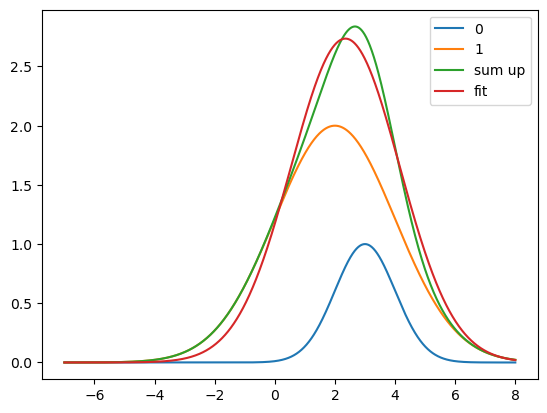

In [40]:

num=2
c=[]
wave_list=np.linspace(-7,8,2000)
for i in range(num):
    c.append(models.Gaussian1D(amplitude=test_A[i], mean=test_central[i], stddev=test_stddev[i]))
    
total=np.zeros_like(c[0](wave_list))

for i in range(num):
    total+=c[i](wave_list)
    
c_init=models.Gaussian1D(amplitude=5, mean=1, stddev=1)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,total)
c_fitted


fig, ax = plt.subplots()
    
for i in range(num):
    ax.plot(wave_list,c[i](wave_list),label=str(i))
    
ax.plot(wave_list,total,label="sum up")
ax.plot(wave_list,c_fitted(wave_list),label="fit")
# ax.plot(wave_list,models.Gaussian1D(amplitude=A, mean=mu, stddev=sigma)(wave_list),label="mine")

ax.legend()
c_fitted

In [31]:
print(sol)

[2.56161638 1.55605626]


In [25]:
## Gaussian1D(amplitude=2.73541282, mean=2.34814509, stddev=1.80349312)>

Text(0.5, 0.5, 'central_wave')

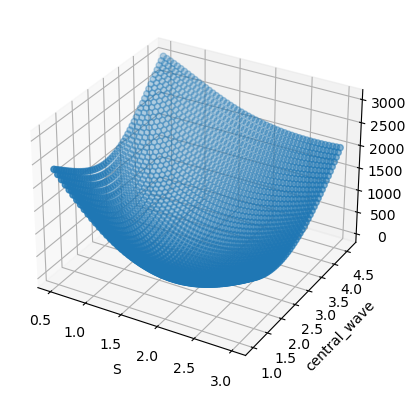

In [30]:
# fig, ax = plt.subplots()
num=50
S =np.linspace(0.5,3,num)
M=np.linspace(1.,4.6,num)
error=np.zeros((num,num))
point=np.zeros((num,num,2))
for i in range(len(S)):
    for j in range(len(M)):
        error[i,j]=sum((models.Gaussian1D(amplitude=2.73541282, mean=M[j], stddev=S[i])(wave_list)-total)**2)
        point[i,j]=[S[i],M[j]]
            
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter3D(point[:,:,0],point[:,:,1],error,zdir='z')
ax.set_xlabel('S')
ax.set_ylabel('central_wave')

# 2 element chore